### Vertex API

In [ ]:
!pip install google-cloud-aiplatform --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-aiplatform
    Found existing installation: google-cloud-aiplatform 1.73.0
    Uninstalling google-cloud-aiplatform-1.73.0:
      Successfully uninstalled google-cloud-aiplatform-1.73.0


In [ ]:
!pip install -qU langchain langchain-google-vertexai google-cloud-aiplatform langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.7/409.7 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os
from google.cloud import aiplatform
from langchain_google_vertexai import ChatVertexAI

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/StuntFree IAM Admin.json"

aiplatform.init(project='788458290127', location='us-central1')

model = ChatVertexAI(model="gemini-pro-vision")

In [ ]:
EXAMPLE_STRUCTURE = [
    {
        "nama": "Nasi Goreng Ayam",
        "jumlah": 1,
        "tipe": "Makanan"
    },
    {
        "nama": "Es Teh Manis",
        "jumlah": 2,
        "tipe": "Minuman"
    },
]

In [ ]:
IMAGE_PATH = "/content/cae3c9123093e72f602d08b23d22f065.jpg"

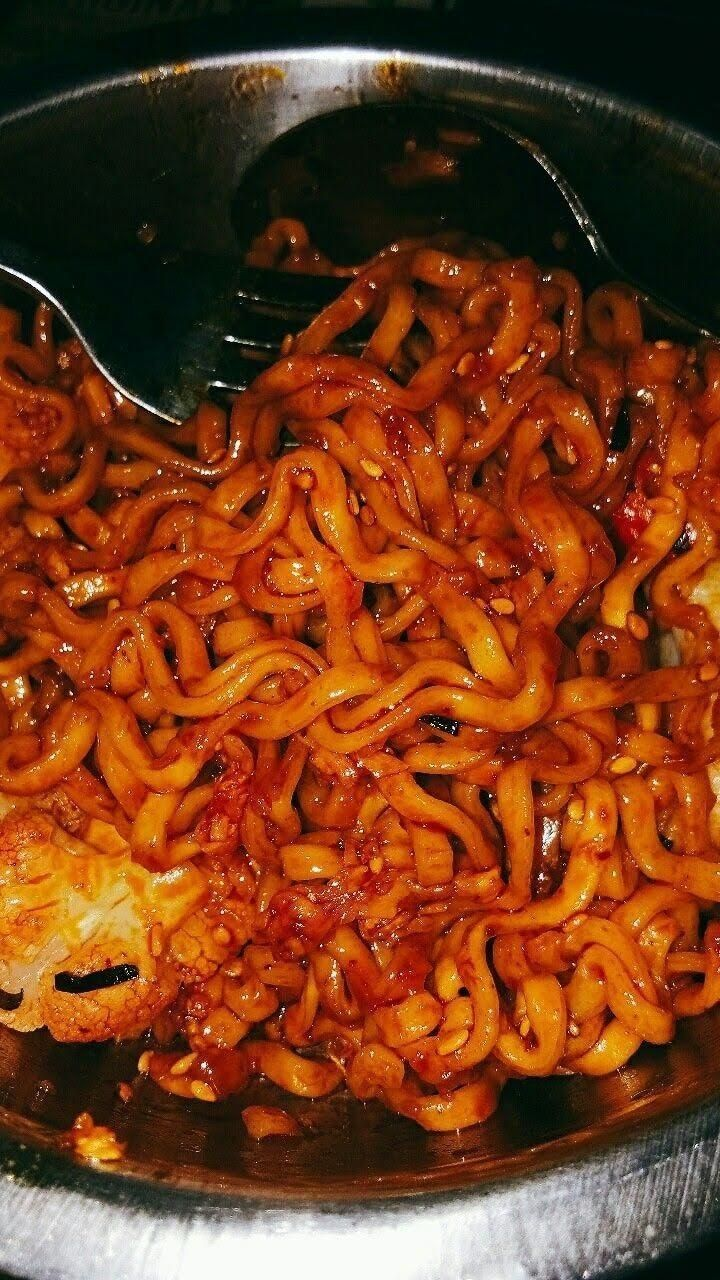

In [ ]:
from vertexai.preview.generative_models import Image

i = Image.load_from_file(IMAGE_PATH)
i

In [ ]:
import base64
from langchain_core.messages import HumanMessage

MAX_WORDS = 5

with open(IMAGE_PATH, "rb") as image_file:
    image_bytes = image_file.read()

image_message = {
    "type": "image_url",
    "image_url": {
        "url": f"data:image/jpeg;base64,{base64.b64encode(image_bytes).decode('utf-8')}"
    },
}
text_message = {
    "type": "text",
    "text": f"""
      You are a culinary expert and you are asked to detect dishes, most of what you will predict is Indonesian food, but it is possible that there are other types of food. Returns the name of the food with the number of servings in Camel Case writing format and can be understood by Indonesians. Give a maximum of {MAX_WORDS} words only, so summarize the name of the dish with only {MAX_WORDS} words.
      The return will be JSON like this
      Example Returns:
      {EXAMPLE_STRUCTURE}
      Note:
      Tipe is only output 'Minuman' or 'Makanan' only!
      You can tell the condiment but only the primary thing only based on photo!
      You must only return the shown dish name and the number of servings only based on photo. If not, you not allowed to tell it!
      I don't need any explanation except a well-formatted json format like in the example. BEFORE YOU GIVE THE ANSWER, YOU MUST RE-CHECK THE JSON STRUCTURE IS LIKE THE EXAMPLE STRUCTURE.
    """,
}

# Prepare input for model consumption
message = HumanMessage(content=[text_message, image_message])

# invoke a model response
output = model.invoke([message])
print(output.content)

 [{'nama': 'Mie Goreng Samyang', 'jumlah': 1, 'tipe': 'Makanan'}]


In [ ]:
import json
result_json = json.loads(output.content.replace("'", '"'))
result_json[0]

{'nama': 'Mie Goreng Samyang', 'jumlah': 1, 'tipe': 'Makanan'}